In [ ]:
import numpy as np
import pandas as pd
import os

base_path = "/content/drive/MyDrive/PCOS"
categories = ["infected", "noninfected"]

image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

df.head()

,image_path,label
0,/content/drive/MyDrive/PCOS/infected/image1152...,infected
1,/content/drive/MyDrive/PCOS/infected/image1152...,infected
2,/content/drive/MyDrive/PCOS/infected/image1153...,infected
3,/content/drive/MyDrive/PCOS/infected/image1153...,infected
4,/content/drive/MyDrive/PCOS/infected/image1153...,infected


In [ ]:
df.tail()

,image_path,label
11779,/content/drive/MyDrive/PCOS/noninfected/Image_...,noninfected
11780,/content/drive/MyDrive/PCOS/noninfected/Image_...,noninfected
11781,/content/drive/MyDrive/PCOS/noninfected/Image_...,noninfected
11782,/content/drive/MyDrive/PCOS/noninfected/Image_...,noninfected
11783,/content/drive/MyDrive/PCOS/noninfected/Image_...,noninfected


In [ ]:
df.shape

(11784, 2)

In [ ]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
image_path,0
label,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11784 entries, 0 to 11783
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  11784 non-null  object
 1   label       11784 non-null  object
dtypes: object(2)
memory usage: 184.3+ KB


In [ ]:
df['label'].unique()

array(['infected', 'noninfected'], dtype=object)

In [ ]:
df['label'].value_counts()

,count
label,
infected,6784
noninfected,5000


<ipython-input-11-f6f285acf7f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis", ax=ax)


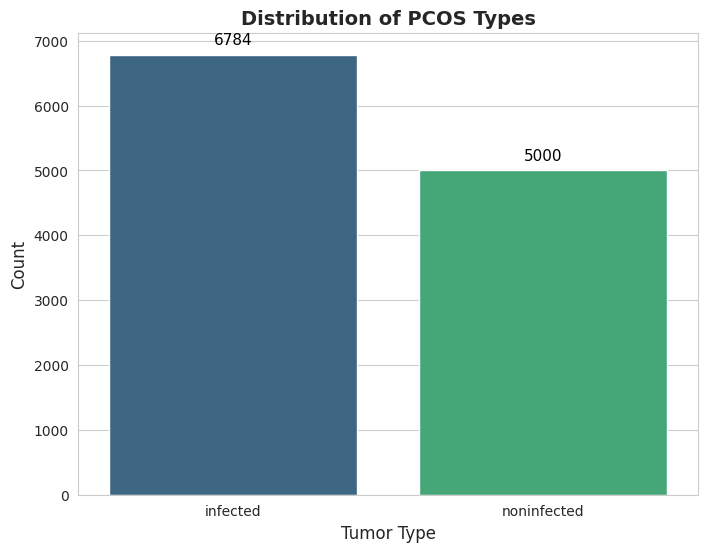

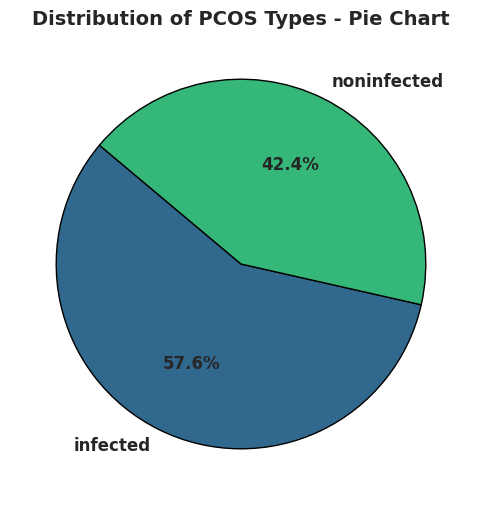

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)
ax.set_title("Distribution of PCOS Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

label_counts = df["label"].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts,
       labels=label_counts.index,
       autopct='%1.1f%%',
       startangle=140,
       colors=colors,
       textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of PCOS Types - Pie Chart", fontsize=14, fontweight='bold')
plt.show()

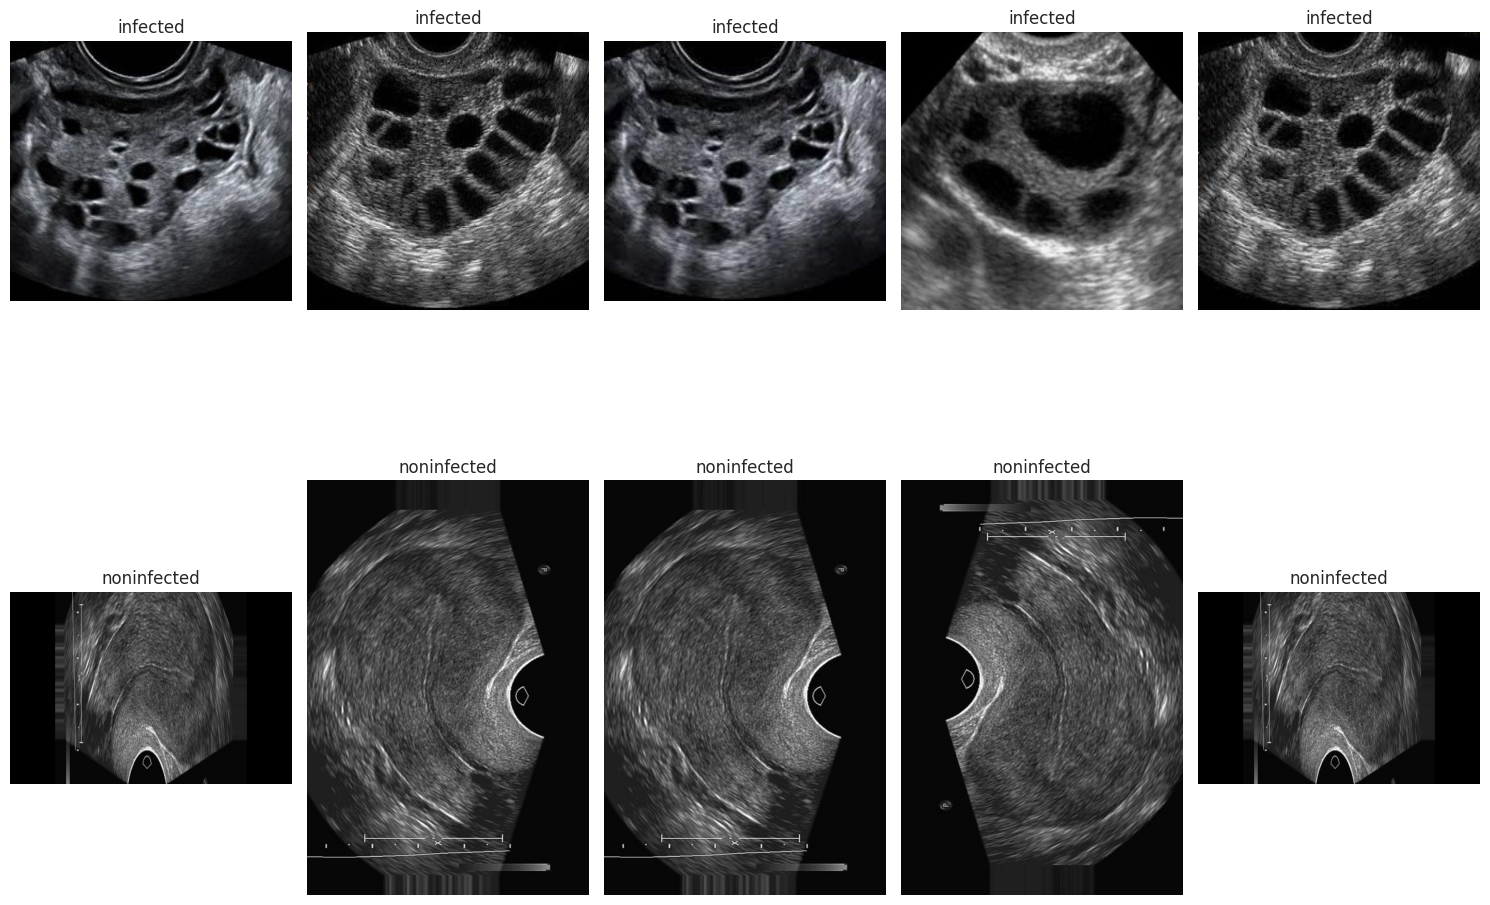

In [ ]:
import cv2
import matplotlib.pyplot as plt

num_images = 5
plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import pandas as pd

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['label'])

df = df[['image_path', 'category_encoded']]

max_count = df['category_encoded'].value_counts().max()
dfs = []

for category in df['category_encoded'].unique():
    class_subset = df[df['category_encoded'] == category]
    class_upsampled = resample(class_subset,
                               replace=True,
                               n_samples=max_count,
                               random_state=42)
    dfs.append(class_upsampled)

df_balanced = pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['category_encoded'].value_counts())

category_encoded
0    6784
1    6784
Name: count, dtype: int64


In [ ]:
df_resampled = df_balanced
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

import time
import shutil
import pathlib
import itertools
from PIL import Image
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import warnings

warnings.filterwarnings("ignore")

print('check')

check


In [ ]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 10854 validated image filenames belonging to 2 classes.
Found 1357 validated image filenames belonging to 2 classes.
Found 1357 validated image filenames belonging to 2 classes.


In [ ]:
print("Num GPUs Available: ",
len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is set for TensorFlow")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found")

No GPU found


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Lambda, Conv2D, MaxPooling2D, Flatten, Dense, Add,
    Reshape, MultiHeadAttention, Concatenate, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model

img_size = (224, 224)
img_shape = (224, 224, 3)
channels = 3

num_classes = len(train_df_new['category_encoded'].unique())

def split_image(image):
    upper_half = image[:, :img_size[0] // 2, :, :]
    lower_half = image[:, img_size[0] // 2:, :, :]
    return upper_half, lower_half

def flip_lower_half(lower_half):
    return tf.image.flip_left_right(lower_half)

input_layer = Input(shape=img_shape)

upper_half, lower_half = Lambda(split_image)(input_layer)
lower_half_flipped = Lambda(flip_lower_half)(lower_half)

upper_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(upper_half)
upper_pool1 = MaxPooling2D((2, 2))(upper_conv1)
upper_conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(upper_pool1)
upper_pool2 = MaxPooling2D((2, 2))(upper_conv2)
upper_conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(upper_pool2)
upper_pool3 = MaxPooling2D((2, 2))(upper_conv3)
upper_flat = Flatten()(upper_pool3)

lower_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(lower_half_flipped)
lower_pool1 = MaxPooling2D((2, 2))(lower_conv1)
lower_conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(lower_pool1)
lower_pool2 = MaxPooling2D((2, 2))(lower_conv2)
lower_conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(lower_pool2)
lower_pool3 = MaxPooling2D((2, 2))(lower_conv3)
lower_flat = Flatten()(lower_pool3)

upper_dense = Dense(512, activation='relu')(upper_flat)
lower_dense = Dense(512, activation='relu')(lower_flat)

upper_reshape = Reshape((1, 512))(upper_dense)
lower_reshape = Reshape((1, 512))(lower_dense)

concat_seq = Concatenate(axis=1)([upper_reshape, lower_reshape])
attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(concat_seq, concat_seq)
attention_pooled = GlobalAveragePooling1D()(attention_output)

fc1 = Dense(256, activation='relu')(attention_pooled)
fc2 = Dense(128, activation='relu')(fc1)
output = Dense(num_classes, activation='softmax')(fc2)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ [(None, 112, 224, │          0 │ input_layer[0][0] │
│                     │ 3), (None, 112,   │            │                   │
│                     │ 224, 3)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 112, 224,  │          0 │ lambda[0][1]      │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 224,  │        896 │ lambda[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 224,  │        896 │ lambda_1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 112,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 56, 112,   │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 112,   │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 112,   │     18,496 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 28, 56,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 28, 56,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 56,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 28, 56,    │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 28,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 14, 28,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50176)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50176)     │          0 │ max_pooling2d_5[

 Total params: 52,257,794 (199.35 MB)

 Trainable params: 52,257,794 (199.35 MB)

 Non-trainable params: 0 (0.00 B)

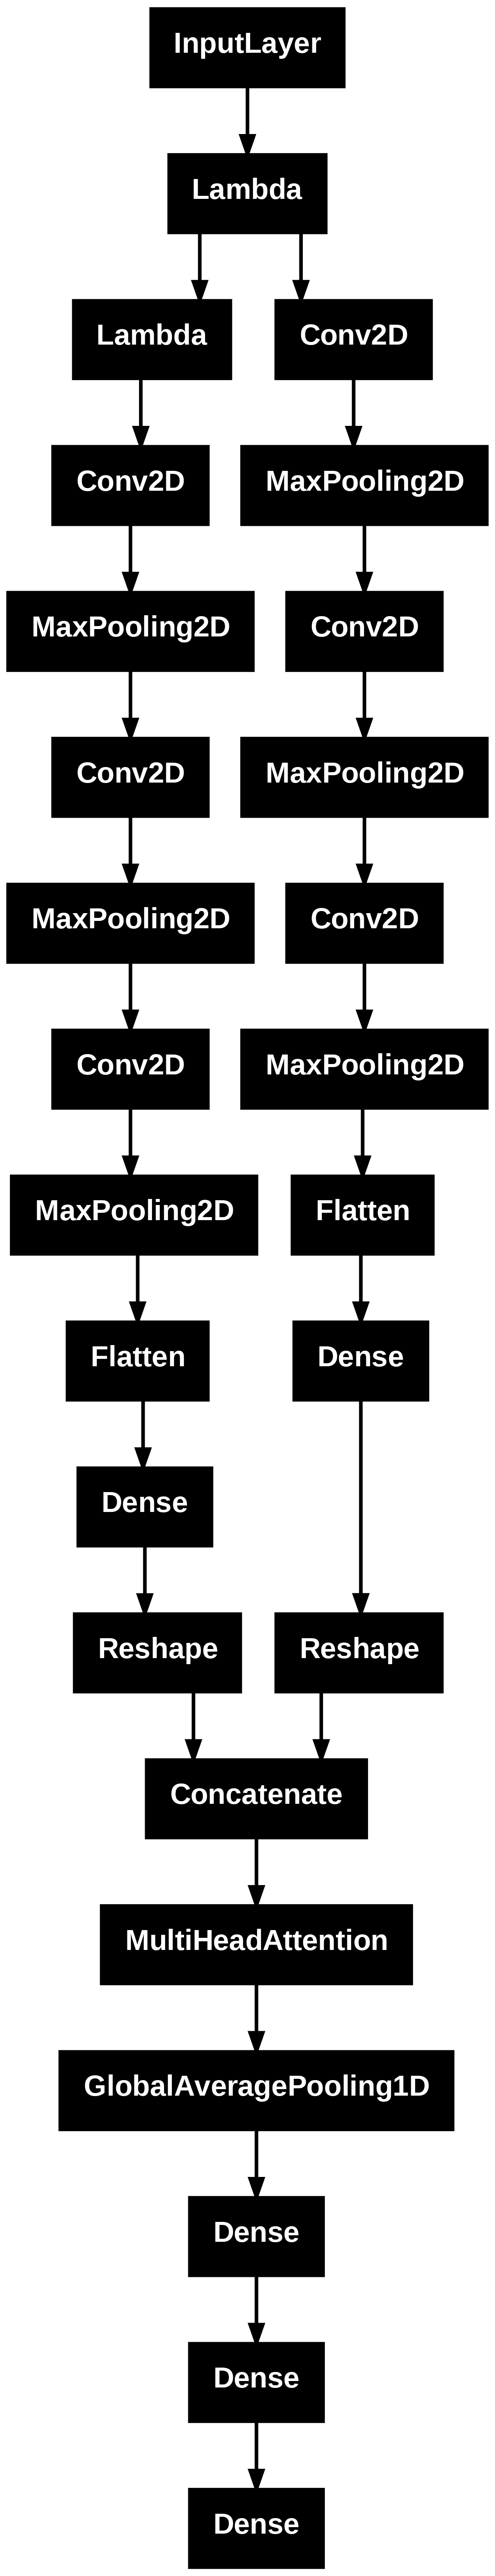

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/model.png', show_shapes=False, show_dtype=False, show_layer_names=False, dpi=300)

In [ ]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=3,
    batch_size=batch_size
)

Epoch 1/3
679/679 ━━━━━━━━━━━━━━━━━━━━ 4390s 6s/step - accuracy: 0.8613 - loss: 0.2970 - val_accuracy: 0.9786 - val_loss: 0.0737
Epoch 2/3
679/679 ━━━━━━━━━━━━━━━━━━━━ 1189s 2s/step - accuracy: 0.9787 - loss: 0.0668 - val_accuracy: 0.9926 - val_loss: 0.0398
Epoch 3/3
679/679 ━━━━━━━━━━━━━━━━━━━━ 1241s 2s/step - accuracy: 0.9889 - loss: 0.0339 - val_accuracy: 0.9919 - val_loss: 0.0390


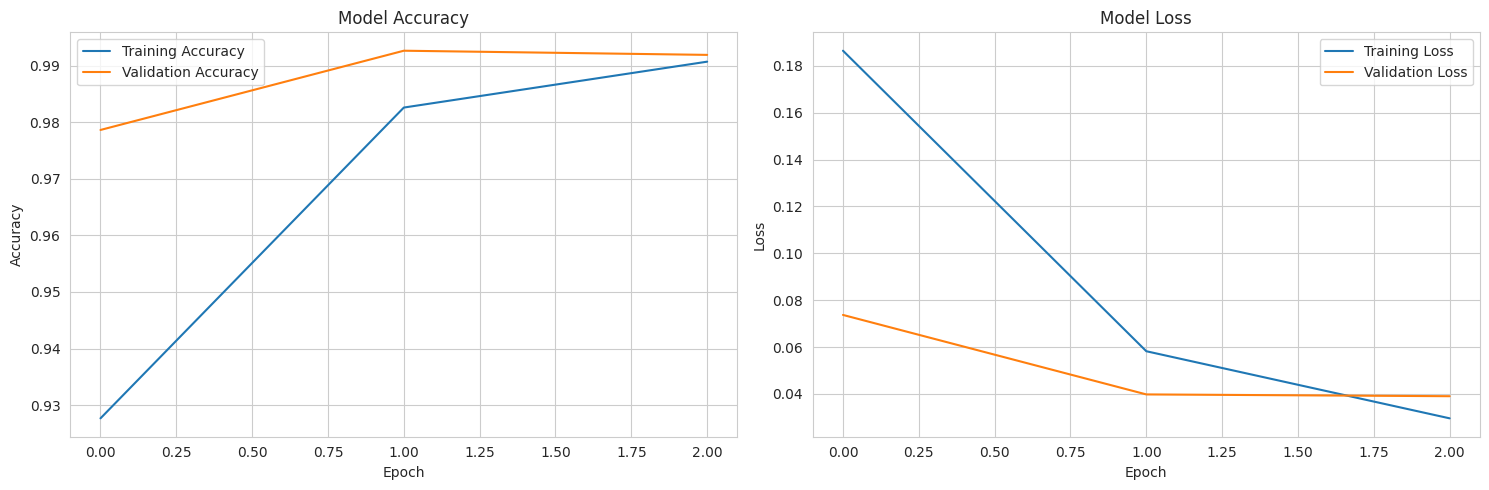

In [ ]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_gen_new)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

85/85 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.9809 - loss: 0.0750
Test Accuracy: 0.9882, Test Loss: 0.0484


85/85 ━━━━━━━━━━━━━━━━━━━━ 32s 375ms/step


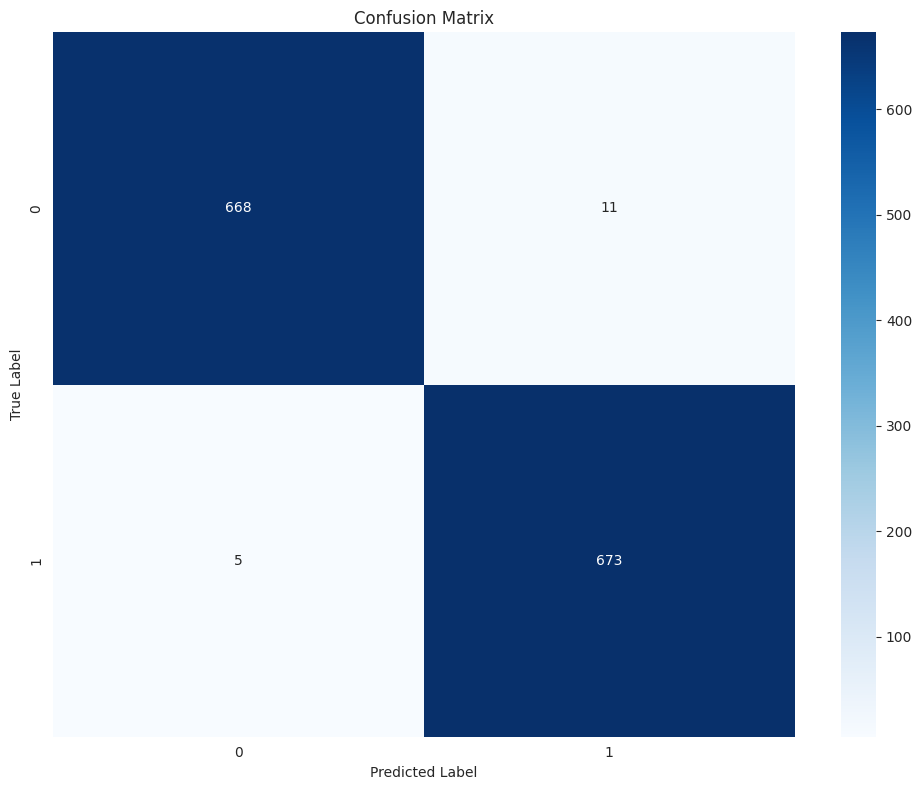

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       679
           1       0.98      0.99      0.99       678

    accuracy                           0.99      1357
   macro avg       0.99      0.99      0.99      1357
weighted avg       0.99      0.99      0.99      1357



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

test_gen_new.reset()

y_pred_probs = model.predict(test_gen_new, verbose=1)

y_pred_classes = np.argmax(y_pred_probs, axis=1)

y_true = test_gen_new.classes

class_names = list(test_gen_new.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))